# Match Analysis

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data Cleaning and Exploration

In [31]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [32]:
matches.shape

(756, 14)

In [33]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration only SRH VS RR matches

In [34]:
SR =matches[np.logical_or(np.logical_and(matches['team1']=='Rajasthan Royals',matches['team2']=='Sunrisers Hyderabad'),
                            np.logical_and(matches['team2']=='Rajasthan Royals',matches['team1']=='Sunrisers Hyderabad'))]

In [35]:
SR.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
416,2013,Jaipur,2013-04-27,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,8,JP Faulkner,Sawai Mansingh Stadium
449,2013,Hyderabad,2013-05-17,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,23,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal"
455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla
461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium
487,2014,Ahmedabad,2014-05-08,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Sunrisers Hyderabad,32,0,B Kumar,"Sardar Patel Stadium, Motera"


In [36]:
SR.shape

(11, 14)

In [37]:
SR.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [38]:
SR.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,11.0,6.636364,11.128996,0.0,0.0,0.0,9.0,32.0
win_by_wickets,11.0,3.909091,3.448320,0.0,0.0,4.0,6.5,9.0


## HEAD TO HEAD

Text(0.5, 1.0, 'RR VS SRH-head to head')

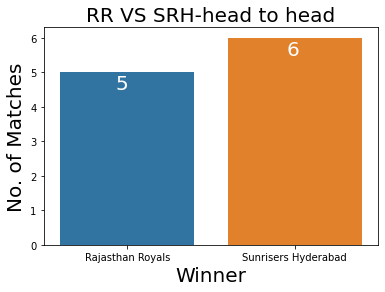

In [10]:
sns.countplot(SR["winner"])
plt.text(-0.07,4.5,str(SR['winner'].value_counts()['Rajasthan Royals']),size=20,color='white')
plt.text(0.95,5.5,str(SR['winner'].value_counts()['Sunrisers Hyderabad']),size=20,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('RR VS SRH-head to head',fontsize = 20)

In [11]:
Season_wise_Match_Winner = pd.DataFrame(SR.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between RR VS SRH :")
Season_wise_Match_Winner

Season wise winner of matches between RR VS SRH :


winner count
season winner                           
2013   Rajasthan Royals                2
       Sunrisers Hyderabad             1
2014   Rajasthan Royals                1
       Sunrisers Hyderabad             1
2015   Rajasthan Royals                1
       Sunrisers Hyderabad             1
2018   Sunrisers Hyderabad             2
2019   Rajasthan Royals                1
       Sunrisers Hyderabad             1

### Winning Percentage

In [12]:
Winning_Percentage = SR['winner'].value_counts()/len(SR['winner'])

In [13]:
print("SRH winning percentage against RR(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("RR winning percentage against RR(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

SRH winning percentage against RR(overall) : 55%
RR winning percentage against RR(overall) : 45%


### Performance Analysis

In [14]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [15]:
performance("Rajasthan Royals",SR)

Number of times given team win while defending : 0
Number of times given team win while chasing   : 5

Average runs by which a given team wins while defending  :  nan
Average wickets by which a given team wins while chasing :  6


<ipython-input-14-f43f02f5572c>:21: RuntimeWarning: invalid value encountered in longlong_scalars
  average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending


From the above we can see that Rajasthan has not won any match while batting first against SRH.

In [16]:
performance("Sunrisers Hyderabad",SR)

Number of times given team win while defending : 4
Number of times given team win while chasing   : 2

Average runs by which a given team wins while defending  :  18.0
Average wickets by which a given team wins while chasing :  7.0


## Toss Analysis

In [17]:
Toss_Decision = pd.DataFrame(SR.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner         toss_decision               
Rajasthan Royals    bat                        1
                    field                      5
Sunrisers Hyderabad bat                        4
                    field                      1

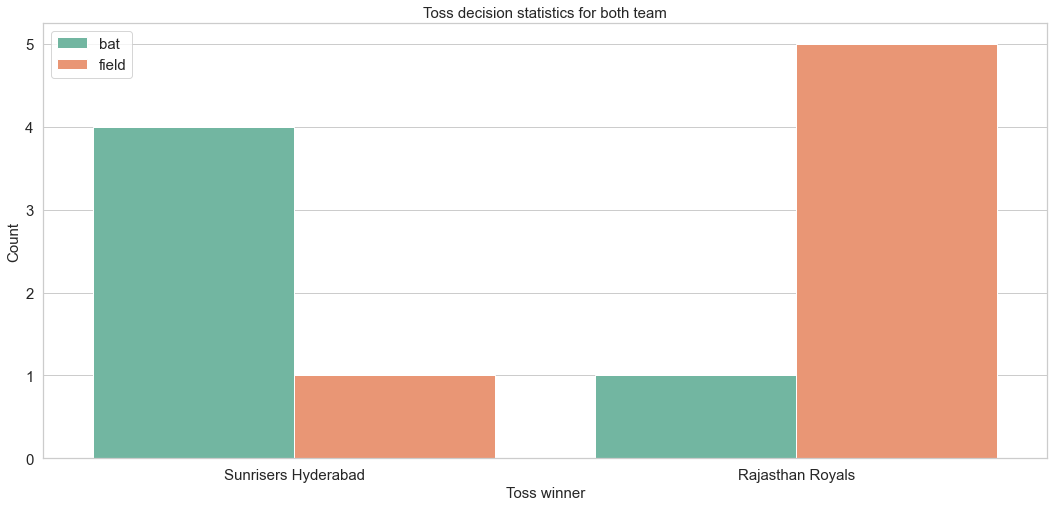

In [18]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(SR['toss_winner'],palette='Set2',hue=SR['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [19]:
Toss_Decision_based_Winner = pd.DataFrame(SR.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner         toss_decision winner                     
Rajasthan Royals    bat           Sunrisers Hyderabad       1
                    field         Rajasthan Royals          3
                                  Sunrisers Hyderabad       2
Sunrisers Hyderabad bat           Rajasthan Royals          2
                                  Sunrisers Hyderabad       2
                    field         Sunrisers Hyderabad       1

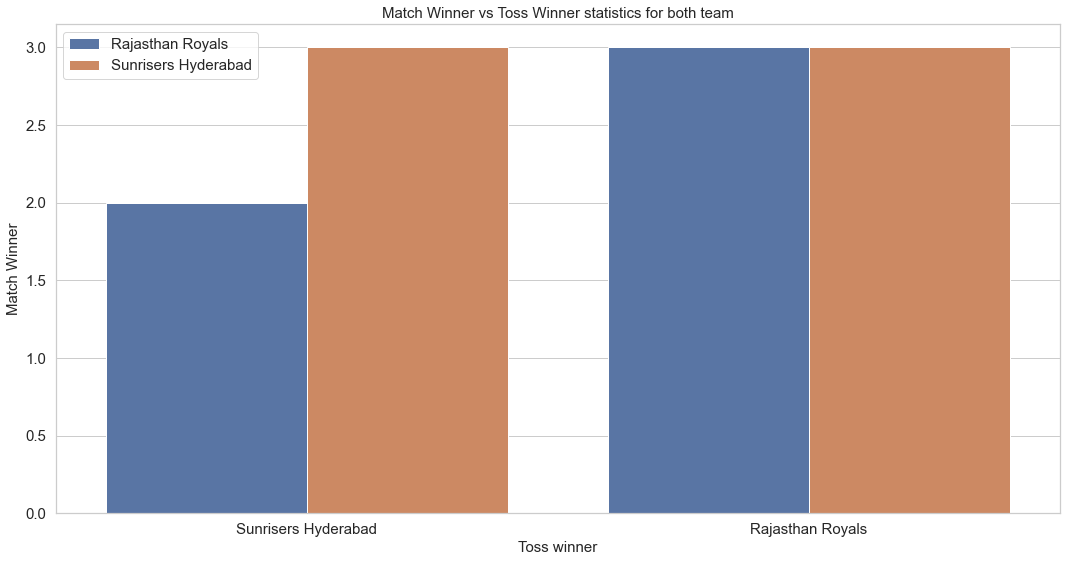

In [20]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SR['toss_winner'],hue=SR['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :


In [21]:
RR = SR[SR["toss_winner"]=="Rajasthan Royals"]
SRH = SR[SR["toss_winner"]=="Sunrisers Hyderabad"]

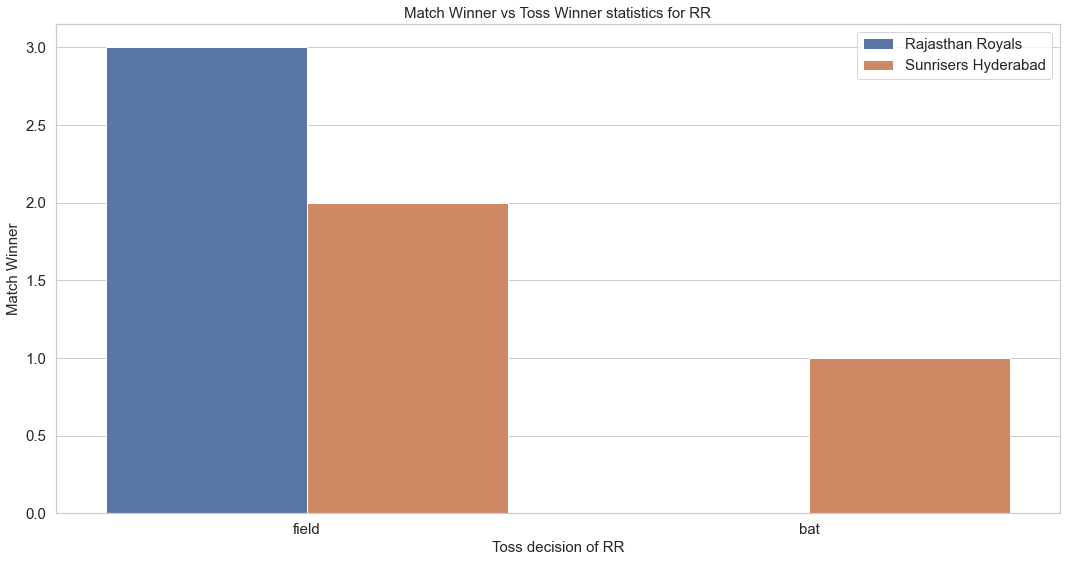

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RR['toss_decision'],hue=RR['winner'])
plt.title('Match Winner vs Toss Winner statistics for RR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

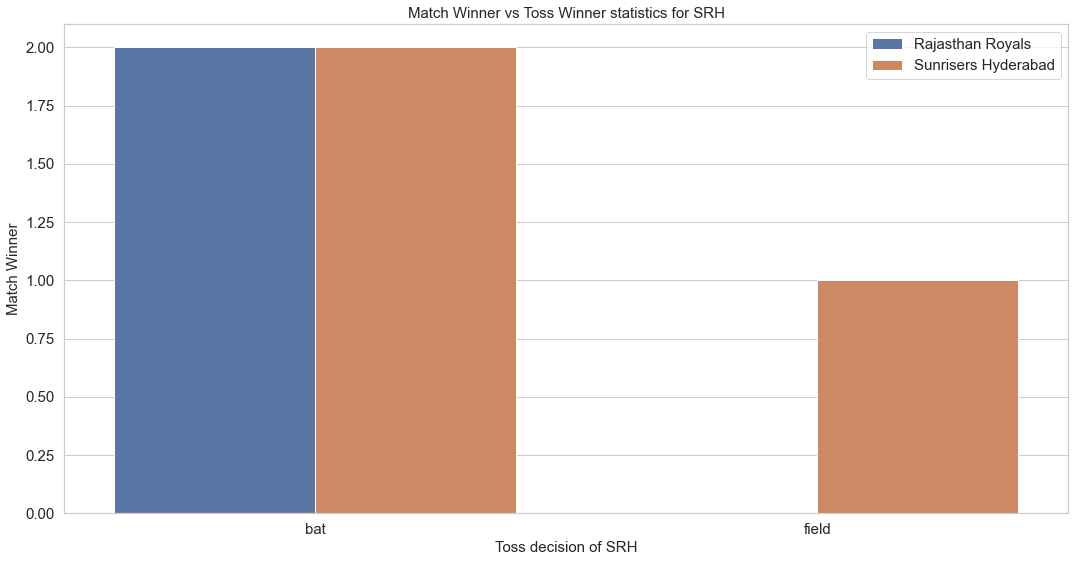

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SRH['toss_decision'],hue=SRH['winner'])
plt.title('Match Winner vs Toss Winner statistics for SRH',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of SRH',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [24]:
player_of_the_match = pd.DataFrame(SR.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
AM Rahane,2
JD Unadkat,1
A Mishra,1
B Kumar,1
Rashid Khan,1
JP Faulkner,1
EJG Morgan,1
S Dhawan,1
BJ Hodge,1
KS Williamson,1


### Recent Year Performance Analysis

In [26]:
cond2 = SR["season"] == 2018
cond3 = SR["season"] == 2019
final = SR[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal"
7921,2018,Jaipur,29/04/18,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,11,0,KS Williamson,Sawai Mansingh Stadium
11144,2019,Hyderabad,29/03/19,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,normal,0,Sunrisers Hyderabad,0,5,Rashid Khan,Rajiv Gandhi Intl. Cricket Stadium
11336,2019,Jaipur,27/04/19,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JD Unadkat,Sawai Mansingh Stadium


In [27]:
final.shape

(4, 14)

In [28]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
KS Williamson,1
S Dhawan,1
Rashid Khan,1
JD Unadkat,1


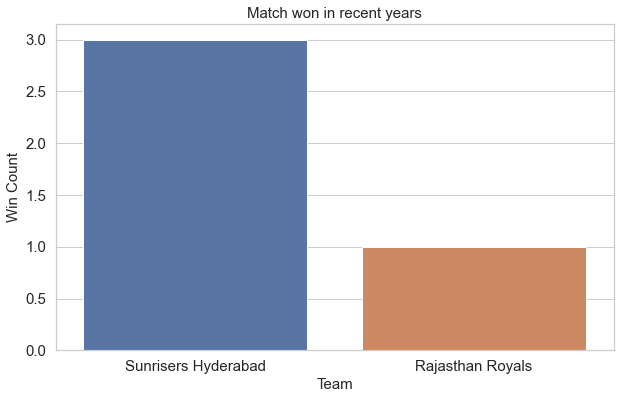

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to head to head , toss decision , win to loss ratio , performance analysis etc we can predict that SRH to be favorite for this match specially if they chase the score.